## Import packages

In [1]:
import pandas as pd
import numpy as np
import pylab as P
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc

from sklearn.svm import SVC
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import seaborn as sns 
import random

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import grid_search

import itertools

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

%matplotlib inline 

## Read data

In [2]:
# read excel file with pandas
train_data = pd.read_excel("rand_combine_disease-drug_trainData1000.xlsx")
train_data[:3]

,Disease-Drug,sub2,sub3,sub4,sub10,sub11,sub12,sub13,sub14,sub15,...,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96,Class
0,acute lymphoblastic leukemia (all) (precursor ...,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


## Get data statistic information

In [3]:
# get number of rows
len(train_data)

1000

In [4]:
# get number of columns
len(train_data.columns)

1648

In [5]:
# get statistical information
train_data.describe()

,sub2,sub3,sub4,sub10,sub11,sub12,sub13,sub14,sub15,sub16,...,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000
mean,0.983000,0.851000,0.476000,0.998000,0.998000,0.974000,0.851000,0.394000,0.833000,0.447000,...,0.047000,0.047000,0.047000,0.003000,0.031000,0.031000,0.031000,0,0.079000,0.381000
std,0.129336,0.356267,0.499674,0.044699,0.044699,0.159215,0.356267,0.488879,0.373162,0.497432,...,0.211745,0.211745,0.211745,0.054717,0.173404,0.173404,0.173404,0,0.269874,0.485876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1.000000,1.000000


Detailed information about columns nature

1. Text info: Desease-Drug
2. Chemical substructure similarity between drugs. - drugs
3. Side effect that describe drug-drug similarity. - drugs
4. Sharing targets between drugs. - drugs
5. Sharing genes between diseases. - diseases
6. miRNA sharing between diseases. - diseases



-- 1 Text: Desease-Drug

-- 491 chemical substructure

-- 817 side effect

-- 136 drug target features for drugs classification

-- 136 miRNAs

-- 64 genes as a feature for diseases

-- class

In [6]:
# save columns names to variable
col = train_data.columns
col

Index([ u'Disease-Drug',          u'sub2',          u'sub3',          u'sub4',
               u'sub10',         u'sub11',         u'sub12',         u'sub13',
               u'sub14',         u'sub15', 
       ...
         u'hsa-mir-7-1',   u'hsa-mir-7-2',   u'hsa-mir-7-3',   u'hsa-mir-765',
         u'hsa-mir-9-1',   u'hsa-mir-9-2',   u'hsa-mir-9-3', u'hsa-mir-92a-1',
          u'hsa-mir-96',         u'Class'],
      dtype='object', length=1648)

In [7]:
# select only columns with chemical substructure similarity between drugs information
chemical_str = train_data[col[1:491]]
chemical_str[:3]

,sub2,sub3,sub4,sub10,sub11,sub12,sub13,sub14,sub15,sub16,...,sub825,sub827,sub831,sub834,sub835,sub840,sub841,sub861,sub862,sub867
0,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,1,1,1,1,0
2,1,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# select only columns with side effect information
n = 491 + 816
side_effect = train_data[col[491:n]]
side_effect[:3]

,abdominal.cramps,abdominal.distention,abdominal.pain,malformations,abscess,acidosis,acquired.immunodeficiency.syndrome,acute.pancreatitis,adenocarcinoma,adenomas,...,bleeding.diathesis,breast.neoplasm,thrombophlebitis.superficial,drug.dependence,prostatic.hypertrophy,allergic.reaction,dysphonia,eosinophilic.pneumonia,retinal.vein.thrombosis,renal.insufficiency
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# select only columns with drug target features for drugs classification information
m = n + 142
sharing_targets = train_data[col[n:(m)]]
sharing_targets[:3]

,abcc8,abl1,abl2,ache,adora1,adora2a,adora2b,adra1a,adra1b,adra1d,...,tubb,tubb1,tubb2a,tubb2b,tubb3,tubb4a,tubb4b,tubb6,tubb7p,tubb8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# select only columns with genes as a feature for diseases information
k = m + 62
sharing_genes = train_data[col[m:k]]
sharing_genes[:3]

,tyms,yes1,app,ar.y,bax,bcl2.y,bmi1,brca2,cacna1c.y,ccnd1.y,...,slitrk1,smad4,smo.y,spi1,stat1,stat3,tgfbr2.y,tnf.y,vegfa.y,vhl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# select only columns with miRNAs information
l = k + 136
miRNAs = train_data[col[k:l]]
miRNAs[:3]

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-630,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# calculate the mean value for each table with particular type of features
mean_df = pd.DataFrame([chemical_str.unstack().mean(), side_effect.unstack().mean(), sharing_targets.unstack().mean(), 
          sharing_genes.unstack().mean(), miRNAs.unstack().mean()], index = ['chemical_str', 'side_effect', 'sharing_targets', 
                                                                            'sharing_genes', 'miRNAs'])
mean_df

,0
chemical_str,0.319308
side_effect,0.139238
sharing_targets,0.030746
sharing_genes,0.021823
miRNAs,0.039346


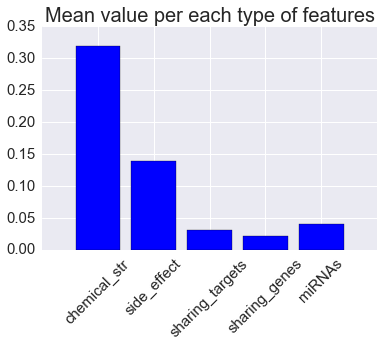

In [13]:
# plot mean value per type
plt.figure(figsize=(15,10))
plt.figure()
plt.title("Mean value per each type of features", size = 20)
plt.bar(range(5), mean_df.values, color="b",align="center")
plt.xticks(range(5),  ['chemical_str', 'side_effect', 'sharing_targets', 
                        'sharing_genes', 'miRNAs'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('Mean_value_per_type_of_features.jpg', bbox_inches='tight')
plt.show()

### In this chart we can see the mean value per ech type of features in the general table

In [14]:
# calculate the Standard Deviation value for each table with particular type of features
std_df = pd.DataFrame([chemical_str.unstack().std(), side_effect.unstack().std(), sharing_targets.unstack().std(), 
          sharing_genes.unstack().std(), miRNAs.unstack().std()], index = ['chemical_str', 'side_effect', 'sharing_targets', 
                                                                            'sharing_genes', 'miRNAs'])
std_df

,0
chemical_str,0.466209
side_effect,0.346195
sharing_targets,0.172631
sharing_genes,0.146105
miRNAs,0.194417


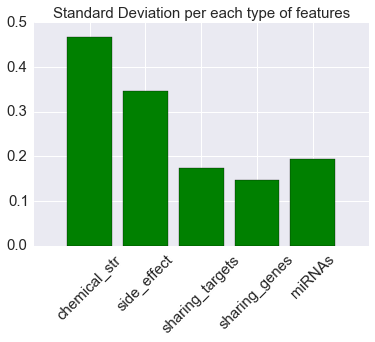

In [15]:
# plot the Standart Deviation for each type of features
plt.figure(figsize=(15,10))
plt.figure()
plt.title("Standard Deviation per each type of features", size = 15)
plt.bar(range(5), std_df.values, color="g",align="center")
plt.xticks(range(5),  ['chemical_str', 'side_effect', 'sharing_targets', 
                        'sharing_genes', 'miRNAs'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('SD_value_per_type_of_features.jpg', bbox_inches='tight')
plt.show()

### In this chart we can see the Standart Deviation value per ech type of features in the general table

# Features dimensionality reduction (to 100 and to 20 features features)

# 1. Features importance

In [16]:
# build the table with only features
X = train_data[col[1:(len(col)-1)]].values
X[:3]

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# get the target
y = train_data[col[len(col)-1]].values
y[:3]

array([1, 1, 1], dtype=int64)

In [18]:
# get features names
col_f = col[1:len(col)-1]

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# print the feature ranking for 10 most important features
print("Feature ranking:")

for f in range(20):
    print("%d. feature  %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], col_f[indices[f]]))

Feature ranking:
1. feature  1620 (0.022669) hsa-mir-34b
2. feature  1457 (0.020868) ccnd1.y
3. feature  1490 (0.018952) myc
4. feature  1619 (0.016706) hsa-mir-34a
5. feature  1532 (0.016097) hsa-mir-125b-2
6. feature  1531 (0.016060) hsa-mir-125b-1
7. feature  1498 (0.015942) rb1.y
8. feature  1563 (0.015272) hsa-mir-16-1
9. feature  1614 (0.014700) hsa-mir-331
10. feature  1453 (0.014367) bcl2.y
11. feature  1605 (0.013313) hsa-mir-27a
12. feature  1513 (0.012836) hsa-let-7b
13. feature  1497 (0.012436) ptgs2.y
14. feature  1469 (0.012238) erbb2.y
15. feature  1511 (0.011164) hsa-let-7a-2
16. feature  1575 (0.010545) hsa-mir-195
17. feature  1561 (0.010484) hsa-mir-15a
18. feature  1621 (0.010422) hsa-mir-34c
19. feature  1510 (0.010212) hsa-let-7a-1
20. feature  1565 (0.010194) hsa-mir-17


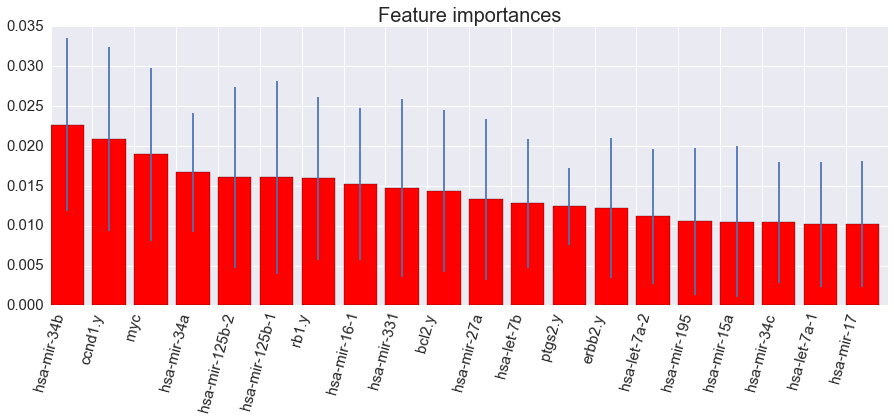

In [19]:
# Plot the feature importances of the forest

plt.figure()
plt.figure(figsize=(15,5))
plt.title("Feature importances", size = 20)
plt.bar(range(20), importances[indices[:20]], color="r", yerr=std[indices[:20]])
plt.xticks(range(20),  col_f[indices[:20]], rotation = 75, size = 15)
plt.yticks(size = 15)
plt.savefig('Features importances.jpg', bbox_inches='tight')
plt.show()

### In this chart we can see the weights of the 20 most important features for class prediction. The feature hsa-mir-34b has the biggest weight for prediction.

# Reduction to 100 features

In [20]:
# select only 100 important features from raw dataset
indices_100 = indices[:100]
col_important = []

for index in indices_100:
    col_important.append(col_f[index])
    
col_important[:3]

[u'hsa-mir-34b', u'ccnd1.y', u'myc']

In [21]:
# save important features to matrix for prediction
X_FI_100 = train_data[col_important].values
X_FI_100[:3]

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [22]:
df_FI_100 = train_data[['Disease-Drug'] + col_important + ['Class']]
df_FI_100.to_csv('Train_data_from_Features_Importances100.csv', index = False)
df_FI_100[:3]

,Disease-Drug,hsa-mir-34b,ccnd1.y,myc,hsa-mir-34a,hsa-mir-125b-2,hsa-mir-125b-1,rb1.y,hsa-mir-16-1,hsa-mir-331,...,hsa-mir-153-2,hsa-mir-144,hsa-mir-20a,tnf.y,hsa-mir-26a-1,hsa-mir-21,hsa-mir-338,hypertrichosis,met.y,Class
0,acute lymphoblastic leukemia (all) (precursor ...,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Reduction to 20 features

In [23]:
# select only 20 important features from raw dataset
indices_20 = indices[:20]
col_important20 = []

for index in indices_20:
    col_important20.append(col_f[index])
    
# save important features to matrix for prediction
X_FI_20 = train_data[col_important20].values


df_FI_20 = train_data[['Disease-Drug'] + col_important20 + ['Class']]
df_FI_20.to_csv('Train_data_from_Features_Importances20.csv', index = False)
df_FI_20[:3]

,Disease-Drug,hsa-mir-34b,ccnd1.y,myc,hsa-mir-34a,hsa-mir-125b-2,hsa-mir-125b-1,rb1.y,hsa-mir-16-1,hsa-mir-331,...,hsa-let-7b,ptgs2.y,erbb2.y,hsa-let-7a-2,hsa-mir-195,hsa-mir-15a,hsa-mir-34c,hsa-let-7a-1,hsa-mir-17,Class
0,acute lymphoblastic leukemia (all) (precursor ...,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Calculate the percent of features of each type in the table with the  100 most important features

In [24]:
# create empty dictionary
types_dic = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    types_dic[name] = []
types_dic

{'chemical_str': [],
 'miRNAs': [],
 'sharing_genes': [],
 'sharing_targets': [],
 'side_effect': []}

In [25]:
# save impoartant feature in its type
for i in xrange(len(col_important)):
    if col_important[i] in chemical_str.columns:
        types_dic['chemical_str'] = types_dic['chemical_str'] + [col_important[i]]
    elif col_important[i] in side_effect.columns:
        types_dic['side_effect'] = types_dic['side_effect'] + [col_important[i]]
    elif col_important[i] in sharing_targets.columns:
        types_dic['sharing_targets'] = types_dic['sharing_targets'] + [col_important[i]]
    elif col_important[i] in sharing_genes.columns:
        types_dic['sharing_genes'] = types_dic['sharing_genes'] + [col_important[i]]
    elif col_important[i] in miRNAs.columns:
        types_dic['miRNAs'] = types_dic['miRNAs'] + [col_important[i]]    


In [26]:
# percent calculate
percent = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    percent[name] = len(types_dic[name])
percent

{'chemical_str': 0,
 'miRNAs': 74,
 'sharing_genes': 25,
 'sharing_targets': 0,
 'side_effect': 1}

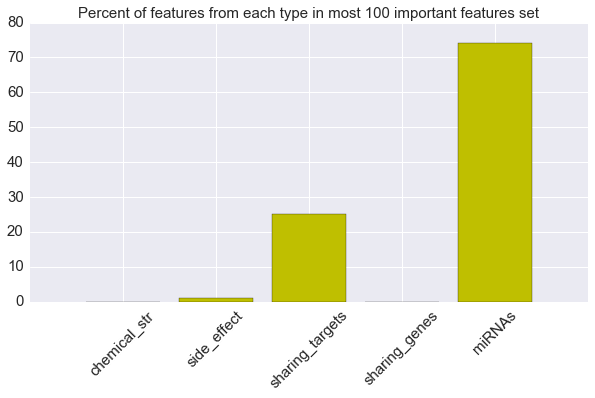

In [27]:
# plot percents of each type
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 100 important features set", size = 15)
plt.bar(range(5), percent.values(), color="y",align="center")
plt.xticks(range(5),  ['chemical_str', 'side_effect', 'sharing_targets', 
                        'sharing_genes', 'miRNAs'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('Features_importances_percent_of_features_100.jpg', bbox_inches='tight')
plt.show()



### We have shown the percent of important features according to each type of features. We can see that the biggest number of important features is from miRNA (sharing between diseases) type. Also , types chemical structure and sharing genes do  not have inportant features.

# Calculate the percent of features of each type in the table with the  20 most important features

In [28]:
# create empty dictionary
types_dic = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    types_dic[name] = []


# save impoartant feature in its type
for i in xrange(len(col_important20)):
    if col_important20[i] in chemical_str.columns:
        types_dic['chemical_str'] = types_dic['chemical_str'] + [col_important20[i]]
    elif col_important[i] in side_effect.columns:
        types_dic['side_effect'] = types_dic['side_effect'] + [col_important20[i]]
    elif col_important20[i] in sharing_targets.columns:
        types_dic['sharing_targets'] = types_dic['sharing_targets'] + [col_important20[i]]
    elif col_important20[i] in sharing_genes.columns:
        types_dic['sharing_genes'] = types_dic['sharing_genes'] + [col_important20[i]]
    elif col_important20[i] in miRNAs.columns:
        types_dic['miRNAs'] = types_dic['miRNAs'] + [col_important20[i]]    

        
# percent calculate
percent = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    percent[name] = len(types_dic[name])
percent

{'chemical_str': 0,
 'miRNAs': 14,
 'sharing_genes': 6,
 'sharing_targets': 0,
 'side_effect': 0}

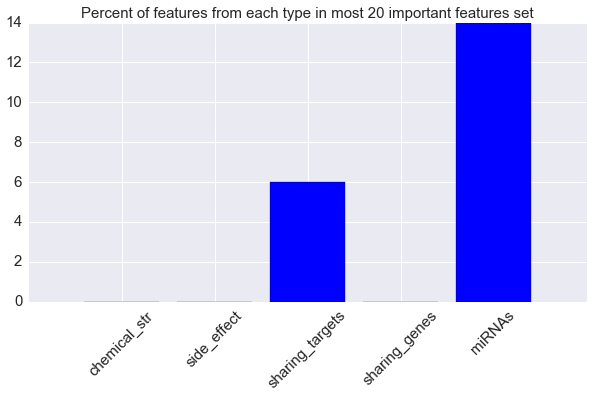

In [29]:
# plot percents of each type
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 20 important features set", size = 15)
plt.bar(range(5), percent.values(), color="b",align="center")
plt.xticks(range(5),  ['chemical_str', 'side_effect', 'sharing_targets', 
                        'sharing_genes', 'miRNAs'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('Features_importances_percent_of_features_20.jpg', bbox_inches='tight')
plt.show()

### We have shown the percent of important features according to each type of features. We can see that the biggest number of important features is from miRNA (sharing between diseases) type. Also , types chemical structure. side effect and sharing genes do  not have members between 20 the most  important features.

# 2. Recursive Feature Elimination

# 100 features

In [30]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select 100 attributes
rfe = RFE(model, 100)
rfe = rfe.fit(X, y)
rank = rfe.ranking_
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False ..., False False False]
[ 242  240 1352 ...,  101 1533  877]


In [31]:
FT = rfe.support_
col_important100 = []

for i in xrange(len(FT)):
    if FT[i] == True:
        col_important100.append(col_f[i])
    
col_important100[:3]

[u'sub200', u'sub422', u'sub439']

In [32]:
len(col_important100)

100

In [33]:
X_FE_100 = train_data[col_important100].values
X_FE_100[:3]

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [34]:
df_FE_100 = train_data[['Disease-Drug'] + col_important100 + ['Class']]
df_FE_100.to_csv('Train_data_from_Recursive_Feature_Elimination100.csv', index = False)
df_FE_100[:3]

,Disease-Drug,sub200,sub422,sub439,sub440,sub455,sub515,sub547,sub559,sub572,...,hsa-mir-29b-2,hsa-mir-335,hsa-mir-34b,hsa-mir-34c,hsa-mir-429,hsa-mir-491,hsa-mir-513a-1,hsa-mir-513a-2,hsa-mir-590,Class
0,acute lymphoblastic leukemia (all) (precursor ...,0,0,1,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# 20 features

In [35]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

# create the RFE model and select 100 attributes
rfe = RFE(model, 20)
rfe = rfe.fit(X, y)
rank = rfe.ranking_
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


FT = rfe.support_
col_important_FE_20 = []

for i in xrange(len(FT)):
    if FT[i] == True:
        col_important_FE_20.append(col_f[i])

X_FE_20 = train_data[col_important_FE_20].values
df_FE_20 = train_data[['Disease-Drug'] + col_important_FE_20 + ['Class']]
df_FE_20.to_csv('Train_data_from_Recursive_Feature_Elimination20.csv', index = False)
df_FE_20[:3]

[False False False ..., False False False]
[ 322  320 1432 ...,  181 1613  957]


,Disease-Drug,sub422,ESR.increased,grin1,kcnh7,kcnn2,nos2,gstp1.y,lrrk2,met.y,...,pten,hsa-mir-155,hsa-mir-15a,hsa-mir-17,hsa-mir-195,hsa-mir-29b-1,hsa-mir-29b-2,hsa-mir-34b,hsa-mir-513a-1,Class
0,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,acute lymphoblastic leukemia (all) (precursor ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Percent of each type calculating

# 100 features

In [36]:
types_dic = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    types_dic[name] = []
types_dic

{'chemical_str': [],
 'miRNAs': [],
 'sharing_genes': [],
 'sharing_targets': [],
 'side_effect': []}

In [37]:
for i in xrange(len(col_important100)):
    if col_important100[i] in chemical_str.columns:
        types_dic['chemical_str'] = types_dic['chemical_str'] + [col_important100[i]]
    elif col_important100[i] in side_effect.columns:
        types_dic['side_effect'] = types_dic['side_effect'] + [col_important100[i]]
    elif col_important100[i] in sharing_targets.columns:
        types_dic['sharing_targets'] = types_dic['sharing_targets'] + [col_important100[i]]
    elif col_important100[i] in sharing_genes.columns:
        types_dic['sharing_genes'] = types_dic['sharing_genes'] + [col_important100[i]]
    elif col_important100[i] in miRNAs.columns:
        types_dic['miRNAs'] = types_dic['miRNAs'] + [col_important100[i]]

In [38]:
percent = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    percent[name] = len(types_dic[name])
percent

{'chemical_str': 11,
 'miRNAs': 42,
 'sharing_genes': 23,
 'sharing_targets': 10,
 'side_effect': 14}

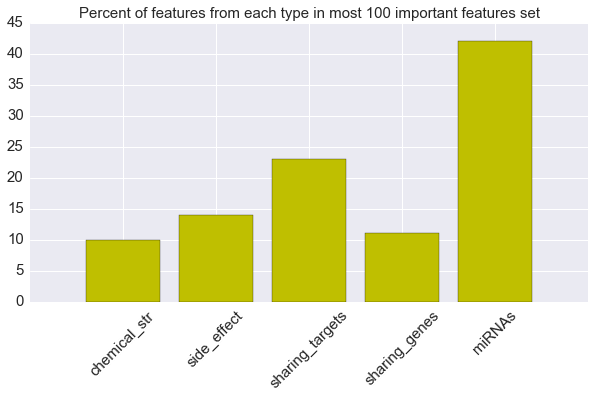

In [39]:
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 100 important features set", size = 15)
plt.bar(range(5), percent.values(), color="y",align="center")
plt.xticks(range(5),  ['chemical_str', 'side_effect', 'sharing_targets', 
                        'sharing_genes', 'miRNAs'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('Features_Elimination_percent_of_features_100.jpg', bbox_inches='tight')
plt.show()



# 20 features

{'sharing_targets': 4, 'side_effect': 1, 'sharing_genes': 6, 'chemical_str': 1, 'miRNAs': 8}


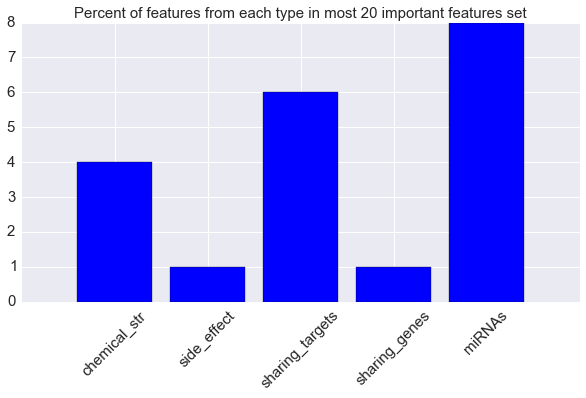

In [40]:
types_dic = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    types_dic[name] = []
types_dic

for i in xrange(len(col_important_FE_20)):
    if col_important_FE_20[i] in chemical_str.columns:
        types_dic['chemical_str'] = types_dic['chemical_str'] + [col_important_FE_20[i]]
    elif col_important_FE_20[i] in side_effect.columns:
        types_dic['side_effect'] = types_dic['side_effect'] + [col_important_FE_20[i]]
    elif col_important_FE_20[i] in sharing_targets.columns:
        types_dic['sharing_targets'] = types_dic['sharing_targets'] + [col_important_FE_20[i]]
    elif col_important_FE_20[i] in sharing_genes.columns:
        types_dic['sharing_genes'] = types_dic['sharing_genes'] + [col_important_FE_20[i]]
    elif col_important_FE_20[i] in miRNAs.columns:
        types_dic['miRNAs'] = types_dic['miRNAs'] + [col_important_FE_20[i]]
        
percent = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    percent[name] = len(types_dic[name])
print percent

plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 20 important features set", size = 15)
plt.bar(range(5), percent.values(), color="b",align="center")
plt.xticks(range(5),  ['chemical_str', 'side_effect', 'sharing_targets', 
                        'sharing_genes', 'miRNAs'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('Features_Elimination_percent_of_features_20.jpg', bbox_inches='tight')
plt.show()

# 3. PCA

# 100 features

In [41]:
# use PCA algorithm for features selection
nf = 100
pca100 = PCA(n_components=nf)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca100.fit(X)

X_PCA_100 = pca100.transform(X)
X_PCA_100[:1]

array([[ -6.69336830e+00,  -1.65822460e+00,   9.36268899e+00,
         -1.90427608e-01,   4.01648873e+00,  -1.76526688e+00,
          3.81426412e-01,  -4.16057529e-02,   7.47266654e-01,
         -9.73196514e-01,   7.75430286e-01,  -6.20272760e-02,
          2.05017204e-01,   2.14079517e-01,  -4.01671079e-01,
          2.24124560e-01,  -2.46262685e-02,   6.06801278e-02,
         -3.70836824e-01,   4.30826084e-01,  -1.08213516e-01,
          5.82454294e-01,  -7.37907318e-02,   5.90123847e-01,
         -3.55428418e-01,   1.80649646e-01,  -4.51479718e-02,
         -1.83439734e-02,   1.51427809e-01,  -2.34047189e-01,
         -2.48965719e-02,   2.12022900e-01,  -2.96566923e-01,
         -1.45089723e-01,   1.71087448e-01,   3.21205477e-02,
          4.46543293e-01,  -4.19862637e-01,  -1.58512480e+00,
          2.49170192e-01,   5.72713187e-01,   2.23528909e-01,
         -1.05046770e+00,  -4.91497296e-01,   6.69857442e-01,
          4.57554804e-01,   9.62053634e-02,  -3.09157963e-01,
        

In [42]:
df_PCA_100 = train_data[['Disease-Drug']]
pca_df = pd.DataFrame(X_PCA_100)
df_PCA_100 = pd.merge(df_PCA_100, pca_df, left_index = True, right_index=True)
df_PCA_100.loc[:, 'Class'] = train_data.loc[:, 'Class']
df_PCA_100.to_csv('Train_data_from_PCA_100_2_classes.csv', index = False)
df_PCA_100[:3]

,Disease-Drug,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Class
0,acute lymphoblastic leukemia (all) (precursor ...,-6.693368,-1.658225,9.362689,-0.190428,4.016489,-1.765267,0.381426,-0.041606,0.747267,...,0.074831,0.056464,0.218570,-0.057484,-0.036405,-0.059965,-0.101639,-0.085253,0.267863,1
1,acute lymphoblastic leukemia (all) (precursor ...,-2.295896,0.810448,-6.167722,2.030408,4.156993,0.223584,5.124359,-1.778741,3.750664,...,0.129776,0.037141,0.225162,-0.020574,-0.055024,-0.007154,-0.076124,-0.196433,0.382179,1
2,acute lymphoblastic leukemia (all) (precursor ...,-4.662952,0.021688,4.578135,1.424623,-1.357322,0.205435,-1.470713,0.142984,0.007939,...,-0.084612,-0.060065,-0.208815,0.053075,0.058932,0.046720,0.131784,0.068773,-0.243772,1


# 20 features

In [43]:
# use PCA algorithm for features selection
nf = 20
pca20 = PCA(n_components=nf)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca20.fit(X)

X_PCA_20 = pca20.transform(X)

df_PCA_20 = train_data[['Disease-Drug']]
pca_df = pd.DataFrame(X_PCA_20)
df_PCA_20 = pd.merge(df_PCA_20, pca_df, left_index = True, right_index=True)
df_PCA_20.loc[:, 'Class'] = train_data.loc[:, 'Class']
df_PCA_20.to_csv('Train_data_from_PCA_20_2_classes.csv', index = False)
df_PCA_20[:3]

,Disease-Drug,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,Class
0,acute lymphoblastic leukemia (all) (precursor ...,-6.693368,-1.658225,9.362689,-0.190428,4.016489,-1.765267,0.381426,-0.041606,0.747267,...,-0.062027,0.205017,0.214080,-0.401671,0.224125,-0.024626,0.060680,-0.370837,0.430826,1
1,acute lymphoblastic leukemia (all) (precursor ...,-2.295896,0.810448,-6.167722,2.030408,4.156993,0.223584,5.124359,-1.778741,3.750664,...,0.843940,0.372490,0.678334,0.714677,-0.460900,0.132151,-0.064677,-0.022743,-0.698899,1
2,acute lymphoblastic leukemia (all) (precursor ...,-4.662952,0.021688,4.578135,1.424623,-1.357322,0.205435,-1.470713,0.142984,0.007939,...,2.234398,-2.740005,0.429561,2.411247,-3.230653,-0.521450,-0.249185,1.876191,0.664828,1


## Pearson correlation coefficient between important features and predicted variable

#### The Pearson's correlation coefficient is calculated by dividing the covariance of the two variables by the product of their standard deviations. It ranges from 1 for perfectly correlated variables to -1 for perfectly anticorrelated variables. 0 means uncorrelated. 

#### Let's calculate Pearson correlation coefficient between all features and choose features with high and low correlations

In [44]:
f1 = []
cc = []

for i in col_important_FE_20:
            f1.append(i)
            cc.append(pearsonr(train_data[i], train_data['Class'])[0])
           
            
pcc3 = pd.DataFrame()
pcc3['features']=f1
pcc3['Pearson correlation coefficient between features and class'] = cc

pcc3 = pcc3.sort(['Pearson correlation coefficient between features and class'])
pcc3.index = range(len(pcc3['features']))
pcc3 = pcc3[:20]
pcc3

,features,Pearson correlation coefficient between features and class
0,hsa-mir-195,-0.038520
1,met.y,-0.037954
2,ESR.increased,-0.031158
3,sub422,-0.024224
4,hsa-mir-15a,-0.009321
5,hsa-mir-17,-0.009282
6,hsa-mir-34b,0.024048
7,lrrk2,0.034254
8,nos2,0.037212
9,pten,0.038292


We can see that we have very low correlation between features and target. It is less than 0.

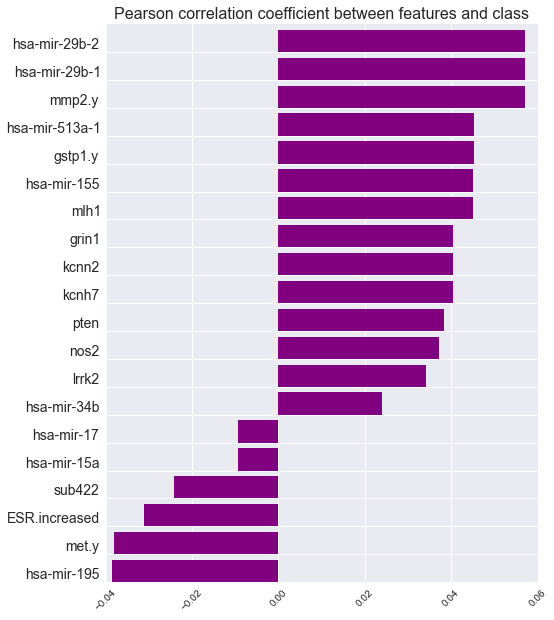

In [45]:
fig = plt.figure(figsize=(10,10))
headers = pcc3['features']    
rects = plt.barh(range(len(pcc3['Pearson correlation coefficient between features and class'])),
                 pcc3['Pearson correlation coefficient between features and class'],
                 height=0.8,
                 align="edge",
                 color="purple",
                 edgecolor="none")

plt.xticks(rotation = 45)
    
plt.yticks(range(len(headers)), headers, ha='right', va='bottom', size='14')
plt.subplots_adjust(left=0.3)
plt.title('Pearson correlation coefficient between features and class', size='16')
plt.grid(True)  
plt.savefig('Pearson correlation coefficient between features_20.jpg', bbox_inches='tight')
plt.show()

### Pearson correlation between important features

C:\Anaconda\lib\site-packages\seaborn-0.6.0-py2.7.egg\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\seaborn-0.6.0-py2.7.egg\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


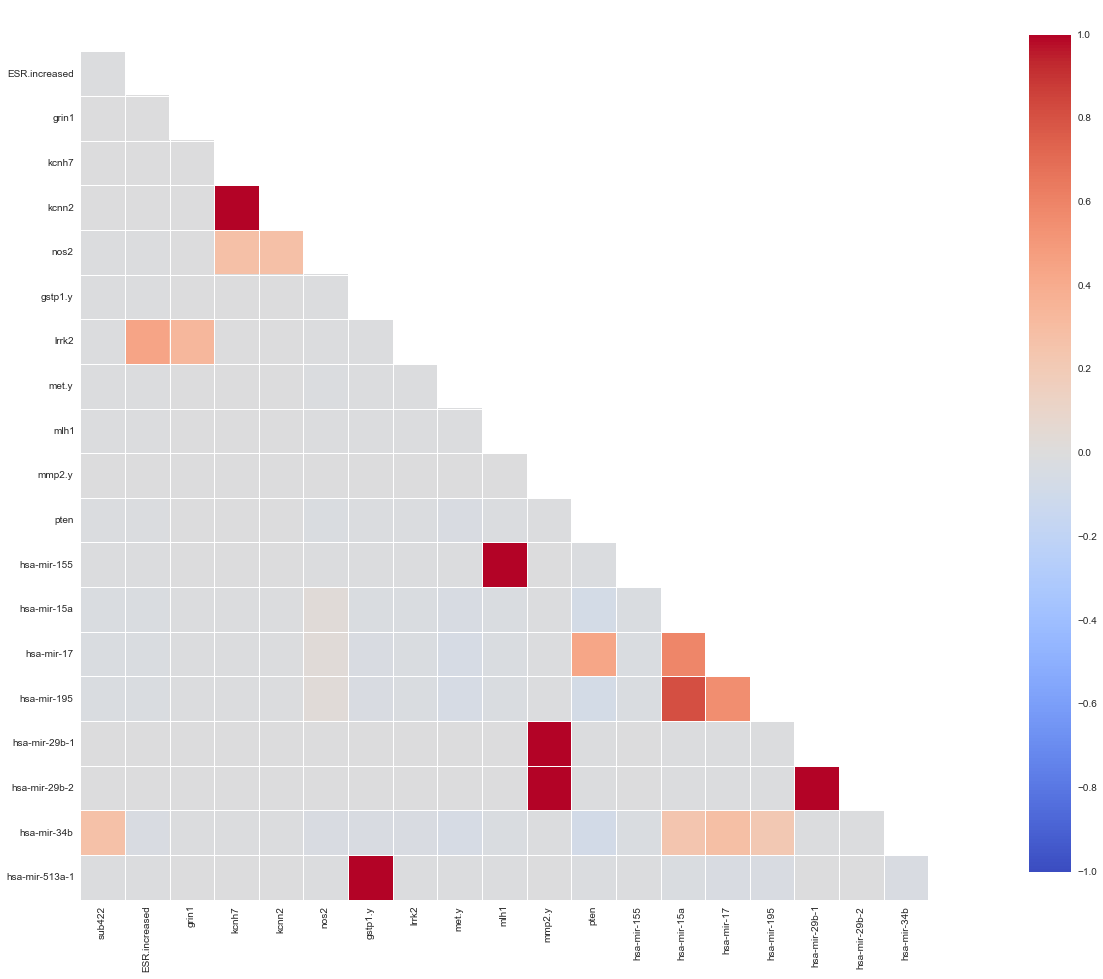

In [46]:
# let's plot the correlation between features, where blue is - the most correlated, red - lowest correlation
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 20))
#sns.corrplot(train_data[col_important2], ax = ax, cmap=sns.diverging_palette(250, 10, n=3, as_cmap=True), diag_names=False)
sns.corrplot(train_data[col_important_FE_20], annot=False, sig_stars=False, diag_names=False)
plt.savefig('Pearson correlation coefficient between features hot chart.jpg', bbox_inches='tight')

## Test data loading

In [47]:
test_data = pd.read_excel("combine_disease-drug_testdata.xlsx")
test_data[:3]

,Disease-Drug,sub2,sub3,sub4,sub10,sub11,sub12,sub13,sub14,sub15,...,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96,Class
0,gallbladder cancer-doxorubicin,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
1,kaposi's sarcoma-doxorubicin,1,1,0,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
2,gastric cancer-porfimer sodium,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
col_test = test_data.columns
col_test_f = col_test[1:len(col_test)-1]
X_test = test_data[col_test_f].values
X_test[:2]

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
y_test = test_data['Class'].values
y_test[:3]

array([1, 1, 1], dtype=int64)

## SVM Model building 

### Linear SVC for all features (1648)

In [50]:
for c in range(1,20):
    pred1 = OneVsRestClassifier(LinearSVC(penalty='l2', loss='hinge', 
                                          dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                          intercept_scaling=2, class_weight=None, verbose=0, 
                                          random_state=0, max_iter=1000)).fit(X, y).predict(X_test)
    print "Test set accuracy:", np.mean(pred1 == y_test)

Test set accuracy: 0.065
Test set accuracy: 0.08
Test set accuracy: 0.19
Test set accuracy: 0.655
Test set accuracy: 0.05
Test set accuracy: 0.22
Test set accuracy: 0.015
Test set accuracy: 0.345
Test set accuracy: 0.035
Test set accuracy: 0.965
Test set accuracy: 0.965
Test set accuracy: 0.965
Test set accuracy: 0.965
Test set accuracy: 0.965
Test set accuracy: 0.97
Test set accuracy: 0.975
Test set accuracy: 0.955
Test set accuracy: 0.955
Test set accuracy: 0.95


## SVM (Support Vector Machines) building model evaluation

Confusion matrix, without normalization
[[  0   0]
 [ 10 190]]


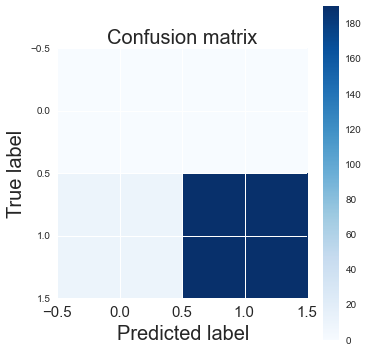

In [51]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    plt.colorbar()
    tick_marks = np.arange(len(pred1))
    plt.xticks(size = 15)
    plt.xticks(size = 15)
    plt.tight_layout()
    plt.ylabel('True label', size = 20)
    plt.xlabel('Predicted label', size = 20)

cm = confusion_matrix(y_test, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_1647_features.jpg', bbox_inches='tight')

### From this chart for confusion matrix we can see, that from 200 true pairs model guess 190 and and predict them as 1 class; 10 it predict as 0 class.

# Sensitivity, specificity, precision calculating

# Standardized equations

sensitivity = recall = tp / t = tp / (tp + fn)

specificity = tn / n = tn / (tn + fp)

precision = tp / p = tp / (tp + fp)

Equations explained

Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative”.

Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

The cheating is resolved by looking at both relevant metrics instead of just one. E.g. the cheating 100% sensitivity that always says “positive” has 0% specificity.


In [52]:
def s_s(cm):
    TP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    TN = cm[1][1]

    try:
        sensitivity = float(TP)/float(TP+FN)
    except:
        sensitivity = 0.0
    sensitivity

    try:
        specificity = float(TN)/float(TN+FP)
    except:
        specificity = 0.0
    specificity

    try:
        precision = float(TP)/float(TP+FP)
    except:
        precision = 0.0
    precision
    
    return sensitivity, specificity, precision


sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.95, 0.0)

# By using 100  features from Features importance methods of reduction

In [54]:
# get important columns from test data

X_test_FI_100 = test_data[col_important].values

X_test_FI_100[:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [55]:
for c in [0.1, 1, 10, 100, 1000]:
    model_FI = OneVsRestClassifier(LinearSVC(penalty='l2', loss='hinge', 
                                          dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                          intercept_scaling=2, class_weight=None, verbose=0, 
                                          random_state=0, max_iter=1000)).fit(X_FI_100, y)
    pred_FI = model_FI.predict(X_test_FI_100)
    print "Test set accuracy:", np.mean(pred_FI == y_test)

Test set accuracy: 0.0
Test set accuracy: 0.015
Test set accuracy: 0.06
Test set accuracy: 0.125
Test set accuracy: 0.265


Confusion matrix, without normalization
[[  0   0]
 [147  53]]


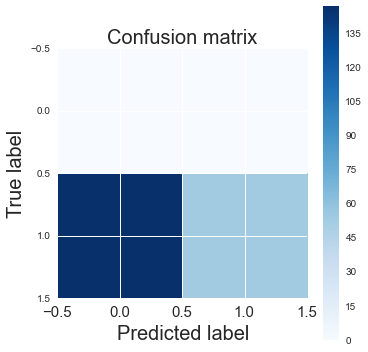

In [56]:
cm = confusion_matrix(y_test, pred_FI)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_100_features_from_Features_importance.jpg', bbox_inches='tight')

### From this chart for confusion matrix we can see, that from 200 true pairs model guess only 53 and and predict them as 1 class;. Other 147 pairs Disease-Drug model considers as 0 class.

In [57]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.265, 0.0)

# By using 20  features from Features importance methods of reduction

Test set accuracy: 0.0
Test set accuracy: 0.0
Test set accuracy: 0.0
Test set accuracy: 0.0
Test set accuracy: 0.0
Confusion matrix, without normalization
[[  0   0]
 [200   0]]


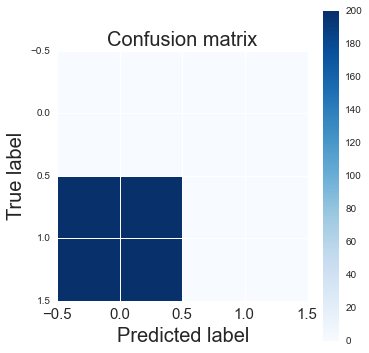

In [58]:
# get important columns from test data

X_test_FI_20 = test_data[col_important20].values

for c in [0.1, 1, 10, 100, 1000]:
    model_FI = OneVsRestClassifier(LinearSVC(penalty='l2', loss='hinge', 
                                          dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                          intercept_scaling=2, class_weight=None, verbose=0, 
                                          random_state=0, max_iter=1000)).fit(X_FI_20, y)
    pred_FI = model_FI.predict(X_test_FI_20)
    print "Test set accuracy:", np.mean(pred_FI == y_test)
    
cm = confusion_matrix(y_test, pred_FI)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_20_features_from_Features_importance.jpg', bbox_inches='tight')

### We can see that this model with 200 features does not work and gives 0.0 Accuracy

In [59]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.0, 0.0)

# By using 100 features from Recursive Feature Elimination method of reduction

In [61]:
# get important columns from test data

X_test_FE_100 = test_data[col_important100].values

X_test_FE_100[:3]

array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [62]:
for c in range(1,70, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        model_FE = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(X_FE_100, y)
        pred_FE = model_FE.predict(X_test_FE_100)
        print "Test set accuracy:", np.mean(pred_FE == y_test)

('hinge', 1)
Test set accuracy: 0.02
('squared_hinge', 1)
Test set accuracy: 0.2
('hinge', 11)
Test set accuracy: 0.02
('squared_hinge', 11)
Test set accuracy: 0.13
('hinge', 21)
Test set accuracy: 0.02
('squared_hinge', 21)
Test set accuracy: 0.725
('hinge', 31)
Test set accuracy: 0.02
('squared_hinge', 31)
Test set accuracy: 0.935
('hinge', 41)
Test set accuracy: 0.065
('squared_hinge', 41)
Test set accuracy: 0.97
('hinge', 51)
Test set accuracy: 0.11
('squared_hinge', 51)
Test set accuracy: 0.975
('hinge', 61)
Test set accuracy: 0.145
('squared_hinge', 61)
Test set accuracy: 0.985


In [63]:
df_FEt = test_data[['Disease-Drug'] + col_important100 + ['Class']]
df_FEt.loc[:, 'Predicted_Class'] = pred_FE
df_FEt.to_csv('Test_data_from_Recursive_Feature_Elimination_100.csv', index = False)
df_FEt[:3]

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Disease-Drug,sub200,sub422,sub439,sub440,sub455,sub515,sub547,sub559,sub572,...,hsa-mir-335,hsa-mir-34b,hsa-mir-34c,hsa-mir-429,hsa-mir-491,hsa-mir-513a-1,hsa-mir-513a-2,hsa-mir-590,Class,Predicted_Class
0,gallbladder cancer-doxorubicin,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,kaposi's sarcoma-doxorubicin,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
2,gastric cancer-porfimer sodium,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1


Confusion matrix, without normalization
[[  0   0]
 [  3 197]]


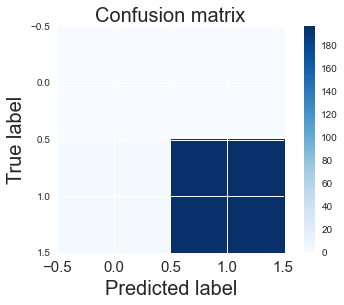

In [64]:
cm = confusion_matrix(y_test, pred_FE)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_100_features_from_Features_Elumination.jpg', bbox_inches='tight')

In [65]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.985, 0.0)

# By using 20 features from Recursive Feature Elimination method of reduction

In [67]:
X_test_FE_20 = test_data[col_important_FE_20].values

for c in range(1,70, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        model_FE = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(X_FE_20, y)
        pred_FE = model_FE.predict(X_test_FE_20)
        print "Test set accuracy:", np.mean(pred_FE == y_test)
        
        


('hinge', 1)
Test set accuracy: 0.015
('squared_hinge', 1)
Test set accuracy: 0.05
('hinge', 11)
Test set accuracy: 0.02
('squared_hinge', 11)
Test set accuracy: 0.05
('hinge', 21)
Test set accuracy: 0.02
('squared_hinge', 21)
Test set accuracy: 0.05
('hinge', 31)
Test set accuracy: 0.02
('squared_hinge', 31)
Test set accuracy: 0.05
('hinge', 41)
Test set accuracy: 0.02
('squared_hinge', 41)
Test set accuracy: 0.05
('hinge', 51)
Test set accuracy: 0.02
('squared_hinge', 51)
Test set accuracy: 0.14
('hinge', 61)
Test set accuracy: 0.02
('squared_hinge', 61)
Test set accuracy: 0.17


Confusion matrix, without normalization
[[  0   0]
 [166  34]]


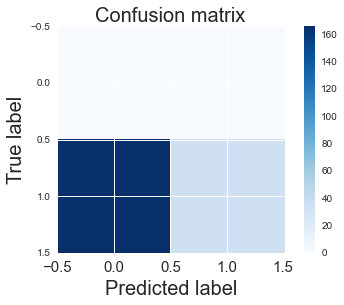

In [68]:
df_FEt = test_data[['Disease-Drug'] + col_important_FE_20 + ['Class']]
df_FEt.loc[:, 'Predicted_Class'] = pred_FE
df_FEt.to_csv('Test_data_from_Recursive_Feature_Elimination_20.csv', index = False)
df_FEt[:3]

cm = confusion_matrix(y_test, pred_FE)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_20_features_from_Features_Elumination.jpg', bbox_inches='tight')

In [69]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.17, 0.0)

# By using features from Principal data analysis method of reduction for 100 features

In [71]:
X_test_PCA_100 = pca100.transform(X_test)
X_test_PCA_100[:1]

array([[  6.91e+00,   1.17e+01,   3.61e+00,  -1.40e+00,   3.35e-01,
          8.89e-01,   1.13e+00,  -1.45e+00,  -1.01e+00,  -6.43e-01,
         -4.24e-01,  -6.08e-02,  -5.24e-01,   2.40e-01,  -6.62e-02,
         -2.43e-01,   3.72e-01,  -5.90e-02,  -5.72e-01,   4.94e-01,
          2.77e-01,   1.17e+00,  -2.32e-02,   6.30e-02,  -7.06e-01,
          9.15e-01,   1.03e-01,  -4.48e-01,   5.92e-01,  -1.11e+00,
         -1.37e+00,   1.27e+00,   2.24e-01,  -9.50e-01,  -1.93e-01,
          2.33e-01,   6.60e-04,   3.64e-01,   4.81e-01,   3.71e-01,
         -3.02e-01,  -2.42e-02,   4.36e-01,  -9.37e-02,  -2.68e-02,
         -2.05e-01,   1.81e-01,  -1.32e-01,  -2.07e-02,   1.09e-01,
          6.69e-03,   9.49e-02,   3.19e-02,   2.20e-01,  -3.47e-02,
          8.13e-02,  -5.61e-02,   8.82e-02,   9.72e-02,   1.25e-01,
         -2.03e-01,   8.85e-02,  -1.93e-02,   7.70e-02,  -2.32e-02,
          2.26e-02,   7.54e-02,   3.49e-02,  -3.92e-03,  -4.87e-04,
          5.39e-02,   7.12e-02,  -1.47e-01,  -5.

In [72]:
for c in range(1,60, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        model_PCA = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(X_PCA_100, y)
        pred_PCA = model_PCA.predict(X_test_PCA_100)
        print "Test set accuracy:", np.mean(pred_PCA == y_test)

('hinge', 1)
Test set accuracy: 0.045
('squared_hinge', 1)
Test set accuracy: 0.15
('hinge', 11)
Test set accuracy: 0.305
('squared_hinge', 11)
Test set accuracy: 0.32
('hinge', 21)
Test set accuracy: 0.36
('squared_hinge', 21)
Test set accuracy: 0.415
('hinge', 31)
Test set accuracy: 0.36
('squared_hinge', 31)
Test set accuracy: 0.355
('hinge', 41)
Test set accuracy: 0.36
('squared_hinge', 41)
Test set accuracy: 0.355
('hinge', 51)
Test set accuracy: 0.36
('squared_hinge', 51)
Test set accuracy: 0.355


Confusion matrix, without normalization
[[  0   0]
 [129  71]]


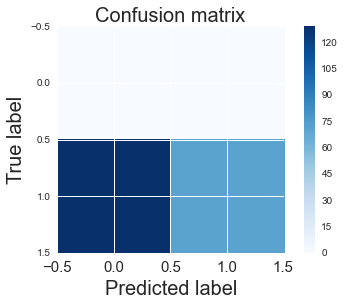

In [73]:
cm = confusion_matrix(y_test, pred_PCA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_100_features_from_PCA.jpg', bbox_inches='tight')

In [74]:
sensitivity, specificity, precision = s_s(cm)
sensitivity, specificity, precision

(0.0, 0.355, 0.0)

# ROC curve building

Area under the ROC curve : nan


[]

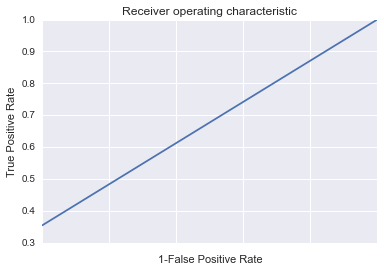

In [75]:
fpr, tpr, thresholds =roc_curve(y_test, pred_PCA)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])

# By using features from Principal data analysis method of reduction for 20 features

In [76]:
X_test_PCA_20 = pca20.transform(X_test)

for c in range(1,60, 10):
    for l in ['hinge', 'squared_hinge']:
        print (l, c)
        model_PCA = OneVsRestClassifier(LinearSVC(penalty='l2', loss=l, 
                                              dual=True, tol=0.01, C=c, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(X_PCA_20, y)
        pred_PCA = model_PCA.predict(X_test_PCA_20)
        print "Test set accuracy:", np.mean(pred_PCA == y_test)

('hinge', 1)
Test set accuracy: 0.0
('squared_hinge', 1)
Test set accuracy: 0.015
('hinge', 11)
Test set accuracy: 0.125
('squared_hinge', 11)
Test set accuracy: 0.29
('hinge', 21)
Test set accuracy: 0.295
('squared_hinge', 21)
Test set accuracy: 0.3
('hinge', 31)
Test set accuracy: 0.445
('squared_hinge', 31)
Test set accuracy: 0.33
('hinge', 41)
Test set accuracy: 0.425
('squared_hinge', 41)
Test set accuracy: 0.33
('hinge', 51)
Test set accuracy: 0.425
('squared_hinge', 51)
Test set accuracy: 0.33


Confusion matrix, without normalization
[[  0   0]
 [134  66]]


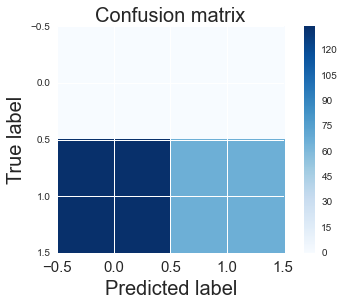

In [77]:
cm = confusion_matrix(y_test, pred_PCA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Model_evaluation_for_20_features_from_PCA.jpg', bbox_inches='tight')

# Conclusion

### The best result we have got by using Recursive Feature Elimination method of reduction and Linear Support Vector Classifier

###Test set accuracy equal 0.985  in this case.

### By using general table with features without any transformations we were able to get the Accuracy = 0.975

### The reduction to 20 features gives worse results for Accuracy than reduction to 100 features

# Final model, which we can consider as the best model

In [78]:
pred1 = OneVsRestClassifier(LinearSVC(penalty='l2', loss='squared_hinge', 
                                              dual=True, tol=0.01, C=61, multi_class='ovr', fit_intercept=True, 
                                              intercept_scaling=2, class_weight=None, verbose=0, 
                                              random_state=0, max_iter=1000)).fit(X_FE_100, y).predict(X_test_FE_100)
print "Test set accuracy:", np.mean(pred1 == y_test)

Test set accuracy: 0.985


Confusion matrix, without normalization
[[  0   0]
 [  3 197]]


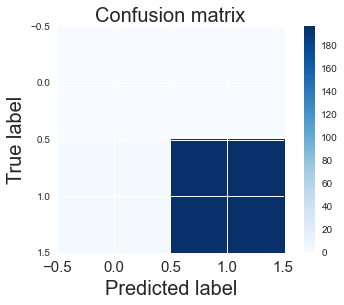

In [79]:
cm = confusion_matrix(y_test, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)


In [80]:
result = test_data[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = pred1
result[:5]

,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,1
1,kaposi's sarcoma-doxorubicin,1,1
2,gastric cancer-porfimer sodium,1,1
3,allograft rejection-prednisone,1,1
4,asthma-zafirlukast,1,1


In [81]:
input_Disease_Drug = 'allograft rejection-methylprednisolone'
result[result['Disease-Drug'] == input_Disease_Drug]

,Disease-Drug,Class,Predicted_class
7,allograft rejection-methylprednisolone,1,1
66,allograft rejection-methylprednisolone,1,1


In [82]:
result.to_csv("Result_Disease_Drug_prediction.csv", index = False)

# Logistic Regression for 2 classes problem 

# For Features importances

In [83]:
clf = LogisticRegression()
clf.fit(X_FI_100, y)
preds = clf.predict_proba(X_test_FI_100)[:,1]
preds

array([ 0.41,  0.25,  0.29,  0.34,  0.39,  0.33,  0.33,  0.39,  0.46,
        0.57,  0.46,  0.43,  0.31,  0.39,  0.36,  0.3 ,  0.39,  0.29,
        0.41,  0.36,  0.46,  0.35,  0.41,  0.49,  0.38,  0.36,  0.36,
        0.48,  0.46,  0.34,  0.31,  0.37,  0.35,  0.41,  0.37,  0.42,
        0.38,  0.44,  0.37,  0.49,  0.31,  0.35,  0.39,  0.44,  0.48,
        0.51,  0.39,  0.38,  0.74,  0.38,  0.39,  0.31,  0.31,  0.36,
        0.22,  0.46,  0.39,  0.3 ,  0.46,  0.42,  0.38,  0.49,  0.41,
        0.36,  0.31,  0.42,  0.34,  0.49,  0.33,  0.36,  0.42,  0.38,
        0.38,  0.48,  0.42,  0.49,  0.36,  0.42,  0.45,  0.49,  0.47,
        0.45,  0.42,  0.25,  0.41,  0.39,  0.49,  0.36,  0.22,  0.48,
        0.46,  0.46,  0.28,  0.38,  0.33,  0.36,  0.35,  0.35,  0.42,
        0.3 ,  0.25,  0.38,  0.42,  0.38,  0.3 ,  0.36,  0.42,  0.42,
        0.41,  0.45,  0.41,  0.54,  0.29,  0.36,  0.49,  0.42,  0.39,
        0.42,  0.46,  0.37,  0.46,  0.41,  0.4 ,  0.34,  0.42,  0.45,
        0.36,  0.38,

In [84]:
result = test_data[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = preds
result.to_csv('Features_Importances_with_probabilities.csv', index = False)
result[:5]

,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,0.409100
1,kaposi's sarcoma-doxorubicin,1,0.249728
2,gastric cancer-porfimer sodium,1,0.286641
3,allograft rejection-prednisone,1,0.341166
4,asthma-zafirlukast,1,0.388107


# For Features Eluminations

In [85]:
clf = LogisticRegression()
clf.fit(X_FE_100, y)
preds = clf.predict_proba(X_test_FE_100)[:,1]
result = test_data[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = preds
result.to_csv('Features_Eluminations_with_probabilities.csv', index = False)
result[:5]

,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,0.466029
1,kaposi's sarcoma-doxorubicin,1,0.236637
2,gastric cancer-porfimer sodium,1,0.278487
3,allograft rejection-prednisone,1,0.296384
4,asthma-zafirlukast,1,0.589642


# For PCA


In [86]:
clf = LogisticRegression()
clf.fit(X_PCA_100, y)
preds = clf.predict_proba(X_test_PCA_100)[:,1]
result = test_data[['Disease-Drug', 'Class']]
result.loc[:, 'Predicted_class'] = preds
result.to_csv('PCA_with_probabilities.csv', index = False)
result[:5]

,Disease-Drug,Class,Predicted_class
0,gallbladder cancer-doxorubicin,1,0.450026
1,kaposi's sarcoma-doxorubicin,1,0.201261
2,gastric cancer-porfimer sodium,1,0.274687
3,allograft rejection-prednisone,1,0.336997
4,asthma-zafirlukast,1,0.593625


# ONE CLASS PREDICTION

## Read data 

In [87]:
# read excel file with pandas
train_data = pd.read_excel("4.xlsx")
train_data[:3]

,Disease,Drug,sub1,sub2,sub3,sub4,sub5,sub6,sub7,sub8,...,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-708,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96
0,acute lymphoblastic leukemia (all) (precursor ...,methotrexate,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,acute lymphoblastic leukemia (all) (precursor ...,prednisone,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,acute lymphoblastic leukemia (all) (precursor ...,nelarabine,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
len(train_data)

638

In [89]:
# display names of columns
col = train_data.columns
col

Index([      u'Disease',          u'Drug',          u'sub1',          u'sub2',
                u'sub3',          u'sub4',          u'sub5',          u'sub6',
                u'sub7',          u'sub8', 
       ...
         u'hsa-mir-7-1',   u'hsa-mir-7-2',   u'hsa-mir-7-3',   u'hsa-mir-708',
         u'hsa-mir-765',   u'hsa-mir-9-1',   u'hsa-mir-9-2',   u'hsa-mir-9-3',
       u'hsa-mir-92a-1',    u'hsa-mir-96'],
      dtype='object', length=4047)

In [90]:
# display number of columns
len(col)

4047

In [91]:
# delete columns  with only 0 values
train_data = train_data.loc[:, (train_data != 0).any(axis=0)]
train_data[:3]

,Disease,Drug,sub1,sub2,sub3,sub4,sub10,sub11,sub12,sub13,...,hsa-mir-630,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96
0,acute lymphoblastic leukemia (all) (precursor ...,methotrexate,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,acute lymphoblastic leukemia (all) (precursor ...,prednisone,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,acute lymphoblastic leukemia (all) (precursor ...,nelarabine,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# display number of columns
col = train_data.columns
len(col)

1649

# Extract Train and Test data

In [93]:
# randomly select 200 rows for testing
random_index = random.sample(train_data.index, 200)
train_data_200 = train_data.ix[random_index]
train_data_200.index = range(len(train_data_200))
train_data_200[:10]

,Disease,Drug,sub1,sub2,sub3,sub4,sub10,sub11,sub12,sub13,...,hsa-mir-630,hsa-mir-7-1,hsa-mir-7-2,hsa-mir-7-3,hsa-mir-765,hsa-mir-9-1,hsa-mir-9-2,hsa-mir-9-3,hsa-mir-92a-1,hsa-mir-96
0,hepatocellular carcinoma,doxorubicin,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,esophageal cancer,porfimer sodium,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,oral cancer,docetaxel,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,prostate cancer,flutamide,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,oral cancer,docetaxel,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,breast cancer,tamoxifen,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,breast cancer,letrozole,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,gastric cancer,etoposide,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,breast cancer,tamoxifen,1,1,1,0,1,1,1,1,...,0,0,0,0,0,1,1,1,0,0
9,gastric cancer,porfimer sodium,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [94]:
len(train_data_200)

200

In [95]:
train_data_400 = train_data.drop(random_index)
train_data_400.index = range(len(train_data_400))
len(train_data_400)

438

In [96]:
X_train = train_data_400[col[2:]].values
X_train

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [97]:
X_test = train_data_200[col[2:]].values
X_test

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

# One Class SVM model building and evaluation with all features

In [98]:
a = 0.0
p = []
for t in [0.0001, 0.001, 0.01, 0.1, 1, 10]: 
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        for g in [0.0001, 0.001, 0.01, 0.1, 1]:
            #print (t,k,g)
            clf = svm.OneClassSVM(tol=t, nu=0.1, kernel=k, gamma=g, verbose=0, 
                                                          random_state=0)
            clf.fit(X_train)
            y_pred_train = clf.predict(X_train)
            y_pred_test = clf.predict(X_test)
            n_error_train = y_pred_train[y_pred_train == 1].size
            n_error_test = y_pred_test[y_pred_test == 1].size
            #print float(n_error_train)/float(len(X_train)), float(n_error_test)/float(len(X_test))
            if float(n_error_test)/float(len(X_test)) > a:
                a = float(n_error_test)/float(len(X_test))
                p.append((t,k,g))
print 'Test Accuracy = ', a
print 'Best parameters ', p[len(p)-1]

Test Accuracy =  0.96
Best parameters  (10, 'sigmoid', 0.01)


# One Class SVM model with PCA for dimensionaly reduction (100)

In [99]:
# use PCA algorithm for features selection
nf = 100
pca = PCA(n_components=nf)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

X_train_PCA_df = pd.DataFrame(X_train_PCA)
X_train_PCA_df.loc[:, 'Disease'] = train_data_400.loc[:, 'Disease']
X_train_PCA_df.loc[:, 'Drug'] = train_data_400.loc[:, 'Drug']
X_train_PCA_df.to_csv('Train_data_PCA_100_1_class.csv', index = False)
X_train_PCA_df[:3]

X_test_PCA_df = pd.DataFrame(X_test_PCA)
X_test_PCA_df.loc[:, 'Disease'] = train_data_200.loc[:, 'Disease']
X_test_PCA_df.loc[:, 'Drug'] = train_data_200.loc[:, 'Drug']
X_test_PCA_df.to_csv('Test_data_PCA_100_1_class.csv', index = False)
X_test_PCA_df[:3]

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,Disease,Drug
0,2.471888,-13.592664,-3.189350,0.895049,-0.321357,0.790141,0.152635,-0.787517,0.568980,-0.783676,...,0.097334,0.042560,-0.185125,-0.107797,-0.141498,0.197533,-0.114232,-0.064543,hepatocellular carcinoma,doxorubicin
1,-4.955039,2.304024,-0.567610,2.017806,-6.238570,4.528305,4.542774,2.911332,2.037902,-1.020637,...,-0.017609,0.063558,-0.236300,-0.208707,0.066338,-0.087156,0.138042,0.119959,esophageal cancer,porfimer sodium
2,8.153192,2.376555,-0.682259,-2.419119,-1.593602,-0.651689,-0.067578,-0.579909,0.358635,-0.112027,...,-0.132917,-0.084022,0.207144,0.111259,0.131847,-0.183453,0.174929,0.052807,oral cancer,docetaxel


In [100]:
a = 0.0
p = []
for t in [0.0001, 0.001, 0.01, 0.1, 1, 10]: 
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        for g in [0.0001, 0.001, 0.01, 0.1, 1]:
            #print (t,k,g)
            clf = svm.OneClassSVM(tol=t, nu=0.1, kernel=k, gamma=g, verbose=0, 
                                                          random_state=0)
            clf.fit(X_train_PCA)
            y_pred_train = clf.predict(X_train_PCA)
            y_pred_test = clf.predict(X_test_PCA)
            n_error_train = y_pred_train[y_pred_train == 1].size
            n_error_test = y_pred_test[y_pred_test == 1].size
            #print float(n_error_train)/float(len(X_train)), float(n_error_test)/float(len(X_test))
            if float(n_error_test)/float(len(X_test)) > a:
                a = float(n_error_test)/float(len(X_test))
                p.append((t,k,g))
print 'Test Accuracy = ', a
print 'Best parameters ', p[len(p)-1]

Test Accuracy =  0.965
Best parameters  (1, 'sigmoid', 1)


# One Class SVM model with PCA for dimensionaly reduction (20)

In [101]:
# use PCA algorithm for features selection
nf = 20
pca = PCA(n_components=nf)

# X is the matrix transposed (n samples on the rows, m features on the columns)
pca.fit(X_train)

X_train_PCA_20 = pca.transform(X_train)
X_test_PCA_20 = pca.transform(X_test)

X_train_PCA_df = pd.DataFrame(X_train_PCA_20)
X_train_PCA_df.loc[:, 'Disease'] = train_data_400.loc[:, 'Disease']
X_train_PCA_df.loc[:, 'Drug'] = train_data_400.loc[:, 'Drug']
X_train_PCA_df.to_csv('Train_data_PCA_20_1_class.csv', index = False)
X_train_PCA_df[:3]

X_test_PCA_df = pd.DataFrame(X_test_PCA_20)
X_test_PCA_df.loc[:, 'Disease'] = train_data_200.loc[:, 'Disease']
X_test_PCA_df.loc[:, 'Drug'] = train_data_200.loc[:, 'Drug']
X_test_PCA_df.to_csv('Test_data_PCA_20_1_class.csv', index = False)
X_test_PCA_df[:3]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Disease,Drug
0,2.471888,-13.592664,-3.189350,0.895049,-0.321357,0.790141,0.152635,-0.787517,0.568980,-0.783676,...,-0.213327,-0.091613,0.209553,0.006553,0.126892,-0.669436,0.436612,-0.312131,hepatocellular carcinoma,doxorubicin
1,-4.955039,2.304024,-0.567610,2.017806,-6.238570,4.528305,4.542774,2.911332,2.037902,-1.020637,...,-0.381090,-0.304844,-0.385381,0.226702,-0.051576,0.052062,-0.062971,0.346260,esophageal cancer,porfimer sodium
2,8.153192,2.376555,-0.682259,-2.419119,-1.593602,-0.651689,-0.067578,-0.579909,0.358635,-0.112027,...,-0.009720,0.012834,-0.141618,0.077121,0.096744,0.017757,0.119552,0.161370,oral cancer,docetaxel


In [102]:
a = 0.0
p = []
for t in [0.0001, 0.001, 0.01, 0.1, 1, 10]: 
    for k in ['linear', 'poly', 'rbf', 'sigmoid']:
        for g in [0.0001, 0.001, 0.01, 0.1, 1]:
            #print (t,k,g)
            clf = svm.OneClassSVM(tol=t, nu=0.1, kernel=k, gamma=g, verbose=0, 
                                                          random_state=0)
            clf.fit(X_train_PCA_20)
            y_pred_train = clf.predict(X_train_PCA_20)
            y_pred_test = clf.predict(X_test_PCA_20)
            n_error_train = y_pred_train[y_pred_train == 1].size
            n_error_test = y_pred_test[y_pred_test == 1].size
            #print float(n_error_train)/float(len(X_train)), float(n_error_test)/float(len(X_test))
            if float(n_error_test)/float(len(X_test)) > a:
                a = float(n_error_test)/float(len(X_test))
                p.append((t,k,g))
print 'Test Accuracy = ', a
print 'Best parameters ', p[len(p)-1]

Test Accuracy =  0.975
Best parameters  (0.0001, 'rbf', 0.001)


# Features importance for dimentionaly reduction - to 20 features

In [103]:
features = col[2:]
features

Index([         u'sub1',          u'sub2',          u'sub3',          u'sub4',
               u'sub10',         u'sub11',         u'sub12',         u'sub13',
               u'sub14',         u'sub15', 
       ...
         u'hsa-mir-630',   u'hsa-mir-7-1',   u'hsa-mir-7-2',   u'hsa-mir-7-3',
         u'hsa-mir-765',   u'hsa-mir-9-1',   u'hsa-mir-9-2',   u'hsa-mir-9-3',
       u'hsa-mir-92a-1',    u'hsa-mir-96'],
      dtype='object', length=1647)

In [104]:
len(features)

1647

In [105]:
a = random.sample(list(features),len(features))
comb = list(itertools.islice(itertools.combinations(a, 20), 500000))
comb[0]

(u'sub571',
 u'cancer',
 u'adenomas',
 u'sub700',
 u'arteriosclerosis',
 u'sub413',
 u'leukocytosis',
 u'tubb6',
 u'sub635',
 u'sinus.congestion',
 u'sub338',
 u'sub685',
 u'sub393',
 u'tubb1',
 u'kcnmb4',
 u'sub424',
 u'hsa-mir-138-1',
 u'sub359',
 u'salivary.gland.enlargement',
 u'gum.hemorrhage')

In [106]:
a = 0.0
p = []
for i in xrange(len(comb)):
    #print i
    X_train_FS_20 = train_data_400[list(comb[i])].values
    X_test_FS_20 = train_data_200[list(comb[i])].values
    clf = svm.OneClassSVM(tol=10, nu=0.1, kernel='sigmoid', gamma=1, verbose=0, 
                                                              random_state=0)
    clf.fit(X_train_FS_20)
    y_pred_train = clf.predict(X_train_FS_20)
    y_pred_test = clf.predict(X_test_FS_20)
    n_error_train = y_pred_train[y_pred_train == 1].size
    n_error_test = y_pred_test[y_pred_test == 1].size

    if float(n_error_test)/float(len(X_test)) > a:
                a = float(n_error_test)/float(len(X_test))
                p = (i, comb[i])
print 'Test Accuracy = ', a 
print 'Best features ', p

Test Accuracy =  1.0
Best features  (287148, (u'sub571', u'cancer', u'adenomas', u'sub700', u'arteriosclerosis', u'sub413', u'leukocytosis', u'tubb6', u'sub635', u'sinus.congestion', u'sub338', u'sub685', u'sub393', u'tubb1', u'kcnmb4', u'sub424', u'hsa-mir-138-1', u'sub359', u'hsa-mir-125b-2', u'sub443'))


In [107]:
df = train_data_400[list(comb[p[0]])]
df.to_csv('Train_data_from_Features_Selection20.csv', index = False)

# Important features comparison

### Display features from Features Elumination reduction for 2 classes problem

In [131]:
FE_columns = col_important_FE_20
FE_columns

[u'sub422',
 u'ESR.increased',
 u'grin1',
 u'kcnh7',
 u'kcnn2',
 u'nos2',
 u'gstp1.y',
 u'lrrk2',
 u'met.y',
 u'mlh1',
 u'mmp2.y',
 u'pten',
 u'hsa-mir-155',
 u'hsa-mir-15a',
 u'hsa-mir-17',
 u'hsa-mir-195',
 u'hsa-mir-29b-1',
 u'hsa-mir-29b-2',
 u'hsa-mir-34b',
 u'hsa-mir-513a-1']

### Display features from Features Selection reduction for 1 class problem

In [132]:
FS_columns = list(p[1])
FS_columns

[u'sub571',
 u'cancer',
 u'adenomas',
 u'sub700',
 u'arteriosclerosis',
 u'sub413',
 u'leukocytosis',
 u'tubb6',
 u'sub635',
 u'sinus.congestion',
 u'sub338',
 u'sub685',
 u'sub393',
 u'tubb1',
 u'kcnmb4',
 u'sub424',
 u'hsa-mir-138-1',
 u'sub359',
 u'hsa-mir-125b-2',
 u'sub443']

In [133]:
def unique(s):
    

    n = len(s)
    if n == 0:
        return []

   
    u = {}
    try:
        for x in s:
            u[x] = 1
    except TypeError:
        del u  # move on to the next method
    else:
        return u.keys()

   
    try:
        t = list(s)
        t.sort()
    except TypeError:
        del t  # move on to the next method
    else:
        assert n > 0
        last = t[0]
        lasti = i = 1
        while i < n:
            if t[i] != last:
                t[lasti] = last = t[i]
                lasti += 1
            i += 1
        return t[:lasti]

    # Brute force is all that's left.
    u = []
    for x in s:
        if x not in u:
            u.append(x)
    return u

In [134]:
general = []

for i in FE_columns:
    general.append(i)
for i in FS_columns:
    general.append(i)
    
general = unique(general)
general

[u'hsa-mir-15a',
 u'cancer',
 u'sub443',
 u'tubb6',
 u'ESR.increased',
 u'leukocytosis',
 u'sub338',
 u'sub424',
 u'sub422',
 u'kcnn2',
 u'sub393',
 u'sub359',
 u'gstp1.y',
 u'nos2',
 u'arteriosclerosis',
 u'lrrk2',
 u'hsa-mir-513a-1',
 u'pten',
 u'hsa-mir-34b',
 u'sinus.congestion',
 u'grin1',
 u'adenomas',
 u'hsa-mir-125b-2',
 u'kcnmb4',
 u'hsa-mir-17',
 u'sub700',
 u'kcnh7',
 u'mlh1',
 u'mmp2.y',
 u'sub571',
 u'hsa-mir-155',
 u'sub635',
 u'tubb1',
 u'sub413',
 u'hsa-mir-29b-1',
 u'hsa-mir-29b-2',
 u'sub685',
 u'met.y',
 u'hsa-mir-195',
 u'hsa-mir-138-1']

In [135]:

        
FE = []
for i in general:
    if i in FE_columns:
        FE.append(1)
    else:
        FE.append(0)
        
FS = []
for i in general:
    if i in FS_columns:
        FS.append(1)
    else:
        FS.append(0)

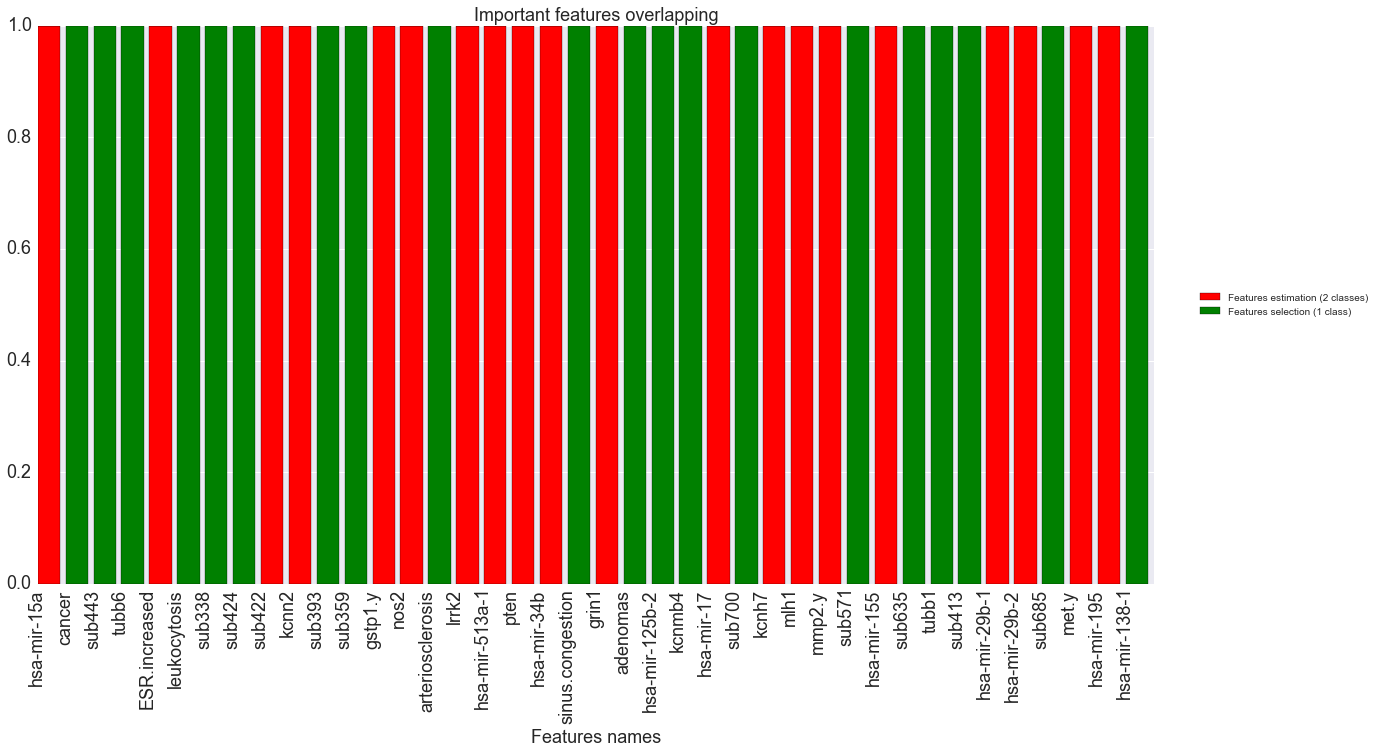

In [137]:
%matplotlib inline


X = range(len(general))
plt.figure(figsize=(20,10))
plt.title('Important features overlapping', size = 18)


p2 = plt.bar(X, FE, color = 'r')
p3 = plt.bar(X, FS, color = 'g', bottom = FE)
plt.xlabel('Features names', size = 18)
plt.xticks(X,  general, rotation = 90, size = 18)
plt.yticks(size = 18)
plt.legend((p2[0], p3[0]), ('Features estimation (2 classes)', 'Features selection (1 class)'), loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.savefig('Important features overlapping.jpg', bbox_inches='tight')
plt.show()

# Similarity calculating

In [138]:
def similar(x,y):
    si = 0
    for a,b in zip(x, y):
        if a == b:
            si += 1
    return (float(si)/float(len(x))) * 100

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

### Between Features importances and Features Selection

In [139]:
print 'Percent of similarity ' + str(similar(FI_columns,FS_columns)) + ' %'

Percent of similarity 0.0 %


### Between Features selection and Features Estimation

In [140]:
print 'Percent of similarity ' + str(similar(FS_columns,FE_columns)) + ' %'

Percent of similarity 0.0 %


# Display the type of the most important features from Features selection 1 Class

{'sharing_targets': 3, 'side_effect': 5, 'sharing_genes': 0, 'chemical_str': 10, 'miRNAs': 2}


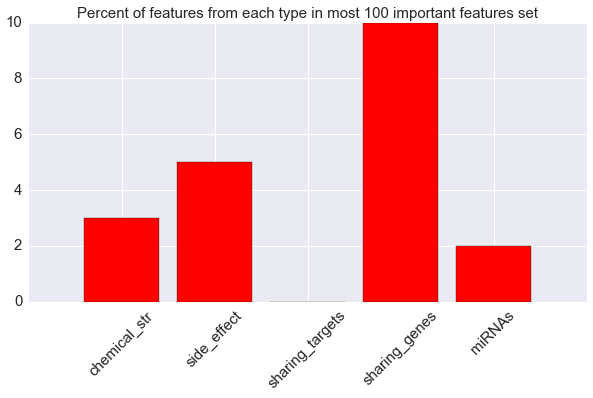

In [141]:
# create empty dictionary
types_dic = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    types_dic[name] = []

    
for i in xrange(len(FS_columns)):
    if FS_columns[i] in chemical_str.columns:
        types_dic['chemical_str'] = types_dic['chemical_str'] + [FS_columns[i]]
    elif FS_columns[i] in side_effect.columns:
        types_dic['side_effect'] = types_dic['side_effect'] + [FS_columns[i]]
    elif FS_columns[i] in sharing_targets.columns:
        types_dic['sharing_targets'] = types_dic['sharing_targets'] + [FS_columns[i]]
    elif FS_columns[i] in sharing_genes.columns:
        types_dic['sharing_genes'] = types_dic['sharing_genes'] + [FS_columns[i]]
    elif FS_columns[i] in miRNAs.columns:
        types_dic['miRNAs'] = types_dic['miRNAs'] + [FS_columns[i]]
        
        
# percent calculate
percent = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    percent[name] = len(types_dic[name])

print percent

plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 100 important features set", size = 15)
plt.bar(range(5), percent.values(), color="r",align="center")
plt.xticks(range(5),  ['chemical_str', 'side_effect', 'sharing_targets', 
                        'sharing_genes', 'miRNAs'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('Features_Selection_percent_of_features_20_1_class.jpg', bbox_inches='tight')
plt.show()

# Display the type of the most important features from Features Elumination for 2 Classes

{'sharing_targets': 4, 'side_effect': 1, 'sharing_genes': 6, 'chemical_str': 1, 'miRNAs': 8}


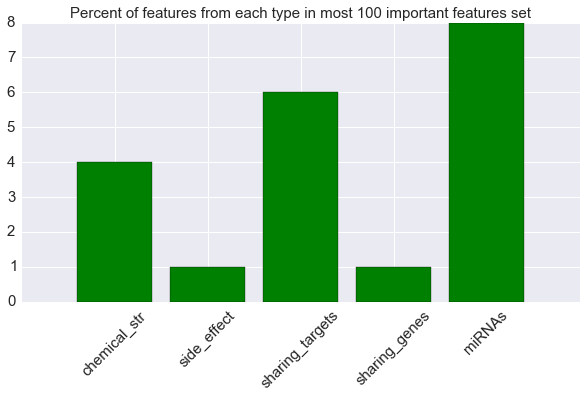

In [142]:
# create empty dictionary
types_dic = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    types_dic[name] = []

    
for i in xrange(len(col_important_FE_20)):
    if col_important_FE_20[i] in chemical_str.columns:
        types_dic['chemical_str'] = types_dic['chemical_str'] + [col_important_FE_20[i]]
    elif col_important_FE_20[i] in side_effect.columns:
        types_dic['side_effect'] = types_dic['side_effect'] + [col_important_FE_20[i]]
    elif col_important_FE_20[i] in sharing_targets.columns:
        types_dic['sharing_targets'] = types_dic['sharing_targets'] + [col_important_FE_20[i]]
    elif col_important_FE_20[i] in sharing_genes.columns:
        types_dic['sharing_genes'] = types_dic['sharing_genes'] + [col_important_FE_20[i]]
    elif col_important_FE_20[i] in miRNAs.columns:
        types_dic['miRNAs'] = types_dic['miRNAs'] + [col_important_FE_20[i]]

        
        
# percent calculate
percent2 = dict()
for name in ['chemical_str', 'side_effect', 'sharing_targets', 'sharing_genes', 'miRNAs']:
    percent2[name] = len(types_dic[name])

print percent2

plt.figure()
plt.figure(figsize=(10,5))
plt.title("Percent of features from each type in most 100 important features set", size = 15)
plt.bar(range(5), percent2.values(), color="g",align="center")
plt.xticks(range(5),  ['chemical_str', 'side_effect', 'sharing_targets', 
                        'sharing_genes', 'miRNAs'], rotation = 45, size = 15)
plt.yticks(size = 15)
plt.savefig('Features_Elumination_percent_of_features_20.jpg', bbox_inches='tight')
plt.show()

In [143]:
print 'From Features Selection for 1 class', percent
print 'From Features Elumination for 2 classes', percent2

From Features Selection for 1 class {'sharing_targets': 3, 'side_effect': 5, 'sharing_genes': 0, 'chemical_str': 10, 'miRNAs': 2}
From Features Elumination for 2 classes {'sharing_targets': 4, 'side_effect': 1, 'sharing_genes': 6, 'chemical_str': 1, 'miRNAs': 8}


# Table with Accuracy results

In [124]:
df = pd.DataFrame(columns = ['Accuracy For 2 classes problem  with 100 features', 'Accuracy For 2 classes problem  with 20 features',
                             'Accuracy For 1 class problem  with 20 features', 'All 1647 features for 2 class problem'                            
                            ], index = ['Reduction with Features Importnaces', 
                            'Reduction with Features Eluminations', 'Reduction with PCA', 
                                                                                        'Reduction with Features Selection',
                                                                                        'All 1647 features'
                                                                                        ])
df = df.fillna(0.0)
df

,Accuracy For 2 classes problem with 100 features,Accuracy For 2 classes problem with 20 features,Accuracy For 1 class problem with 20 features,All 1647 features for 2 class problem
Reduction with Features Importnaces,0,0,0,0
Reduction with Features Eluminations,0,0,0,0
Reduction with PCA,0,0,0,0
Reduction with Features Selection,0,0,0,0
All 1647 features,0,0,0,0


In [125]:
df.columns

Index([u'Accuracy For 2 classes problem  with 100 features',
       u'Accuracy For 2 classes problem  with 20 features',
       u'Accuracy For 1 class problem  with 20 features',
       u'All 1647 features for 2 class problem'],
      dtype='object')

In [126]:
df['Accuracy For 2 classes problem  with 100 features']['Reduction with Features Importnaces'] = 0.265
df['Accuracy For 2 classes problem  with 20 features']['Reduction with Features Importnaces'] = 0.0
df['Accuracy For 2 classes problem  with 100 features']['Reduction with Features Eluminations'] = 0.985
df['Accuracy For 2 classes problem  with 20 features']['Reduction with Features Eluminations'] = 0.17
df['Accuracy For 2 classes problem  with 100 features']['Reduction with PCA'] = 0.415
df['Accuracy For 2 classes problem  with 20 features']['Reduction with PCA'] = 0.445
df['All 1647 features for 2 class problem']['All 1647 features'] = 0.96
df['Accuracy For 1 class problem  with 20 features']['All 1647 features'] = 0.965
df['Accuracy For 1 class problem  with 20 features']['Reduction with PCA'] = 0.99
df['Accuracy For 1 class problem  with 20 features']['Reduction with Features Selection'] = 1.0

In [127]:
df

,Accuracy For 2 classes problem with 100 features,Accuracy For 2 classes problem with 20 features,Accuracy For 1 class problem with 20 features,All 1647 features for 2 class problem
Reduction with Features Importnaces,0.265,0.000,0.000,0.00
Reduction with Features Eluminations,0.985,0.170,0.000,0.00
Reduction with PCA,0.415,0.445,0.990,0.00
Reduction with Features Selection,0.000,0.000,1.000,0.00
All 1647 features,0.000,0.000,0.965,0.96


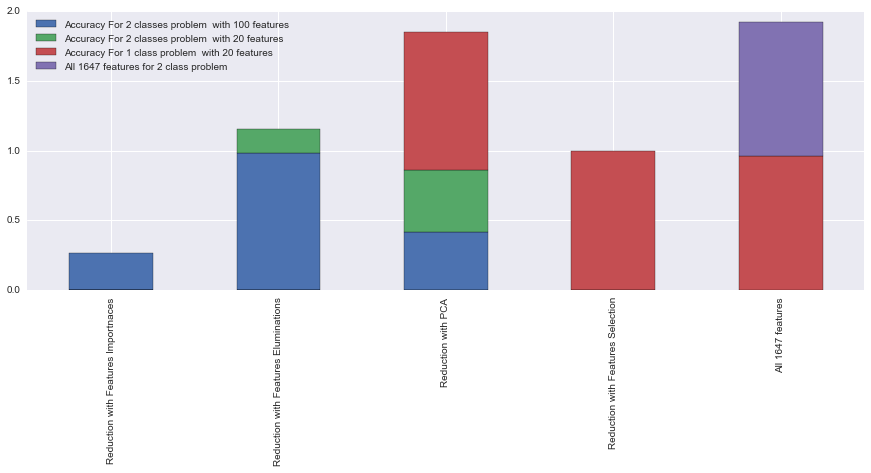

In [128]:

df.plot(kind='bar', stacked=True, figsize = (15, 5))
plt.savefig('Accuracy.jpg', bbox_inches='tight')

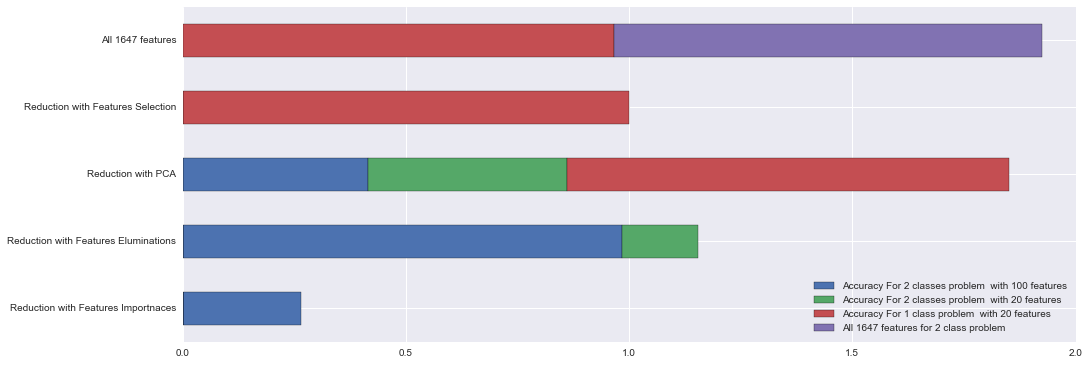

In [129]:
df.plot(kind='barh', stacked=True, figsize=(16, 6));
plt.savefig('Accuracy2.jpg', bbox_inches='tight')

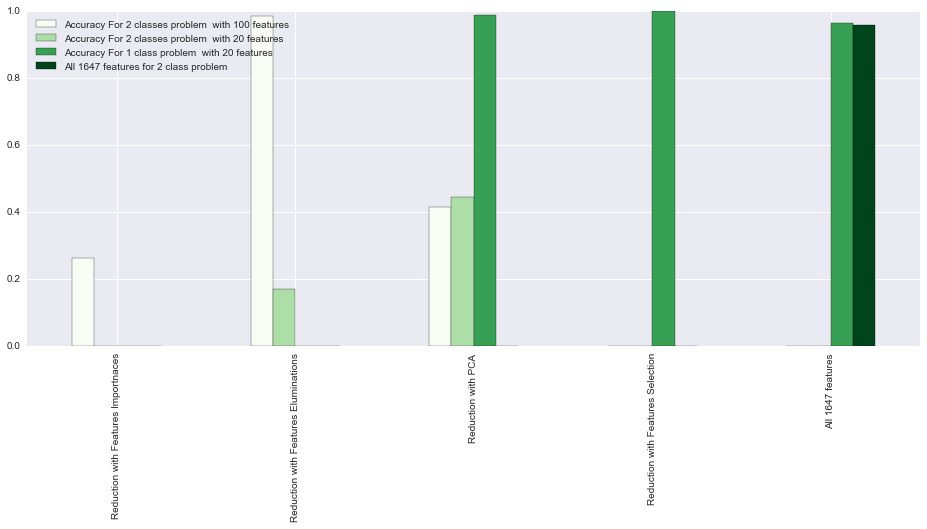

In [130]:
df.plot(kind='bar', colormap='Greens', legend = 'right', figsize=(16, 6))
plt.savefig('Accuracy3.jpg', bbox_inches='tight')